In [246]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy.optimize as op
from __future__ import division
import warnings
warnings.filterwarnings('ignore')

In [247]:
data=pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [248]:
data.shape

(569, 33)

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [173]:
data.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [174]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [175]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [176]:
data['Diagnosis']=pd.get_dummies(data.diagnosis, drop_first=True)

In [177]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Diagnosis
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [178]:
data.Diagnosis.value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

In [179]:
data.drop("diagnosis",axis=1,inplace= True)

In [180]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

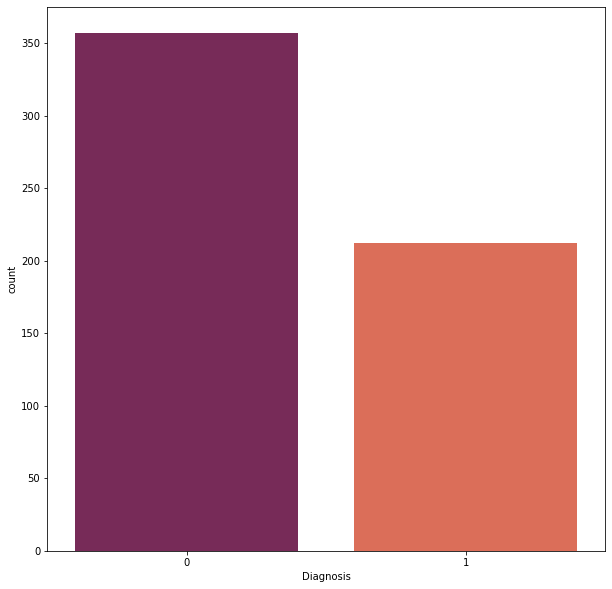

In [181]:
plt.figure(figsize=(10,10))
sns.countplot(x="Diagnosis",data=data,palette='rocket')

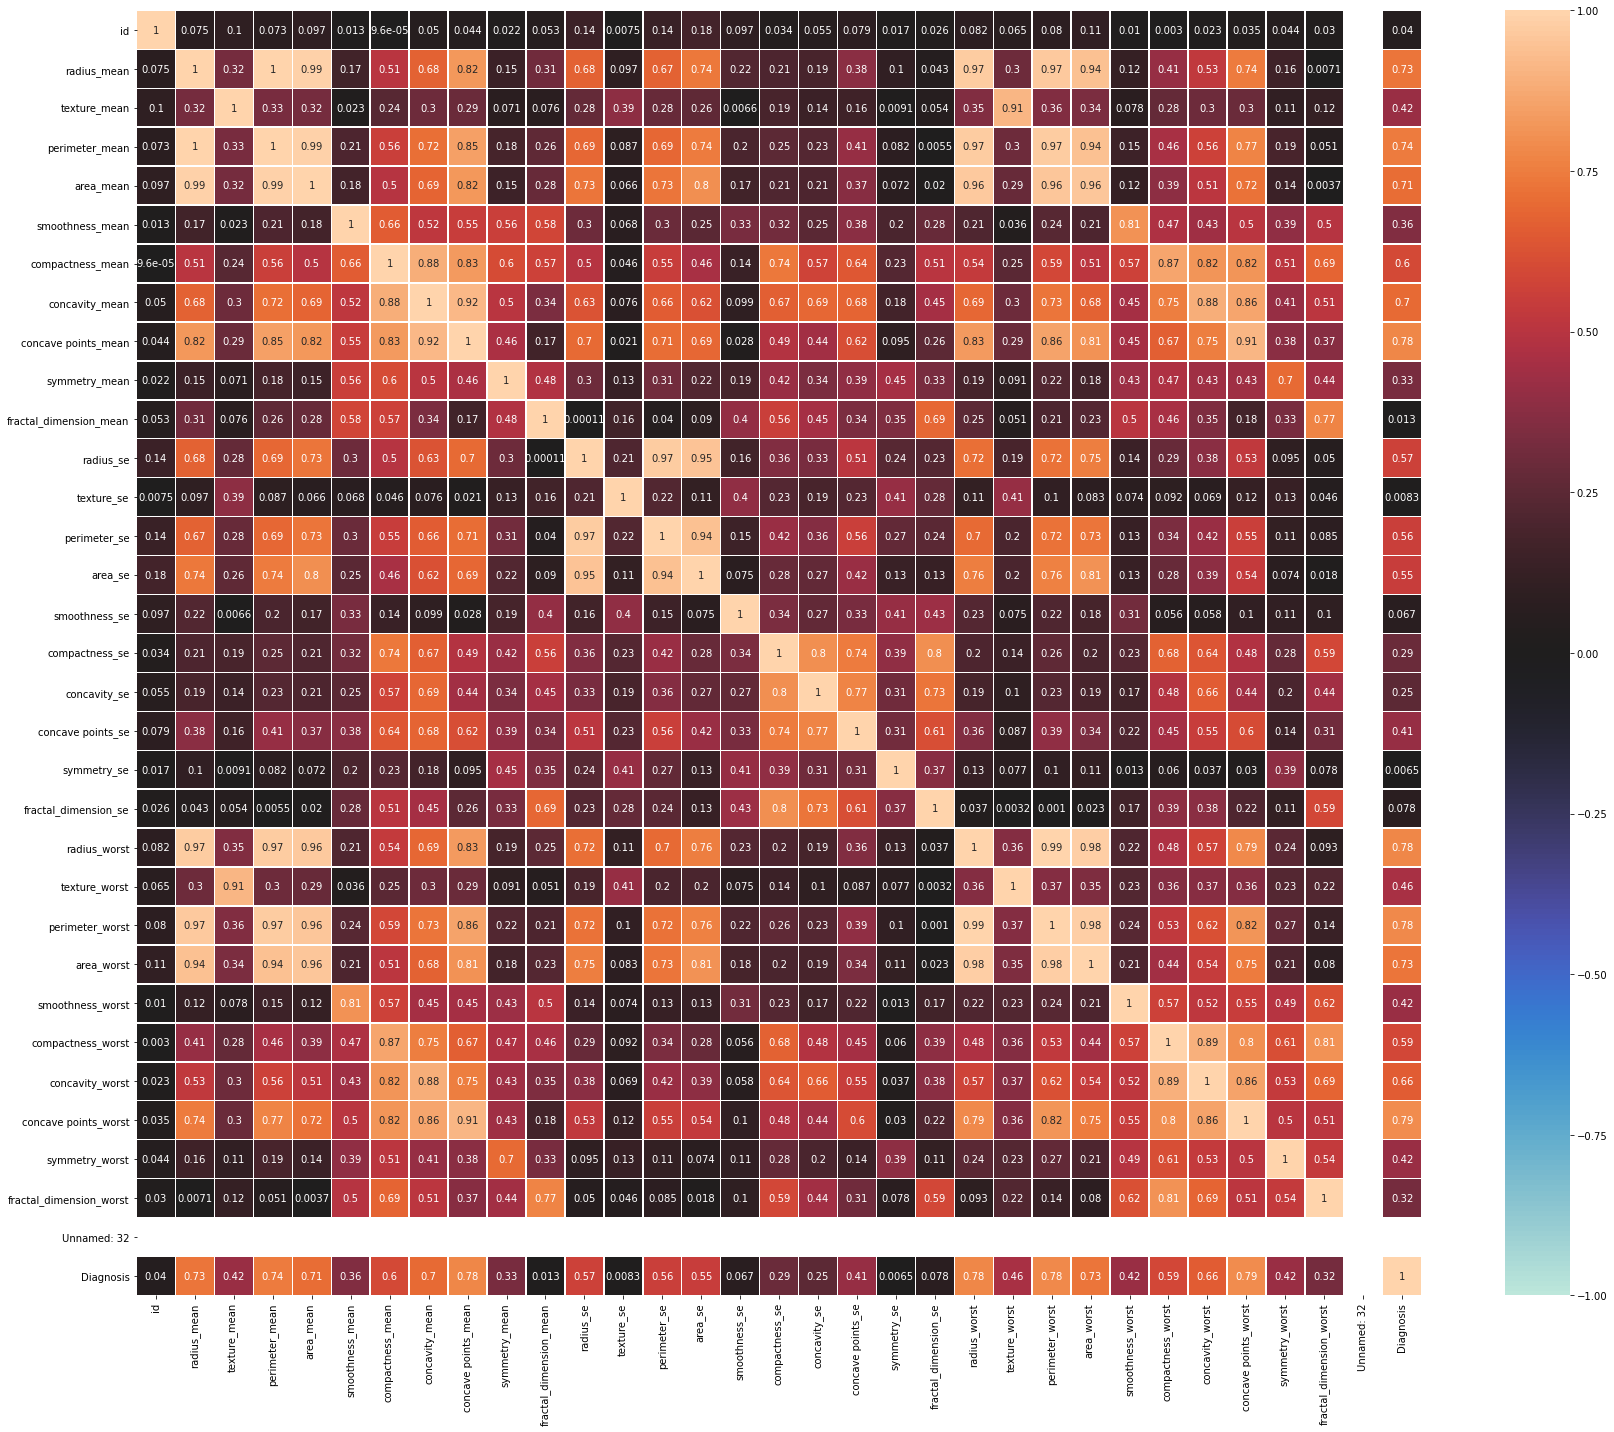

In [182]:
data_corr = data.corr().abs()
plt.figure(figsize=(25, 20))
sns.heatmap(data_corr, vmin=-1, vmax=1, annot=True,
            square=True, center=0, linewidths=.5)
plt.tight_layout()

In [183]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [184]:
def correlation_matrix(df):
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    cmap = 'tab20'
    
    cax = ax1.imshow(df.corr().abs(), interpolation='nearest', cmap=cmap)
    
    ax1.grid(True)
    plt.title('Correlation Matrix of the WBCD features', fontsize=20)
    labels=list(df.columns)
    
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    
    ax1.set_xticklabels(labels, fontsize=15, horizontalalignment='left', rotation='vertical')
    ax1.set_yticklabels(labels, fontsize=15)
    
    fig.colorbar(cax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.show()

In [185]:
data_features = data.drop(data.columns[-2], axis=1)


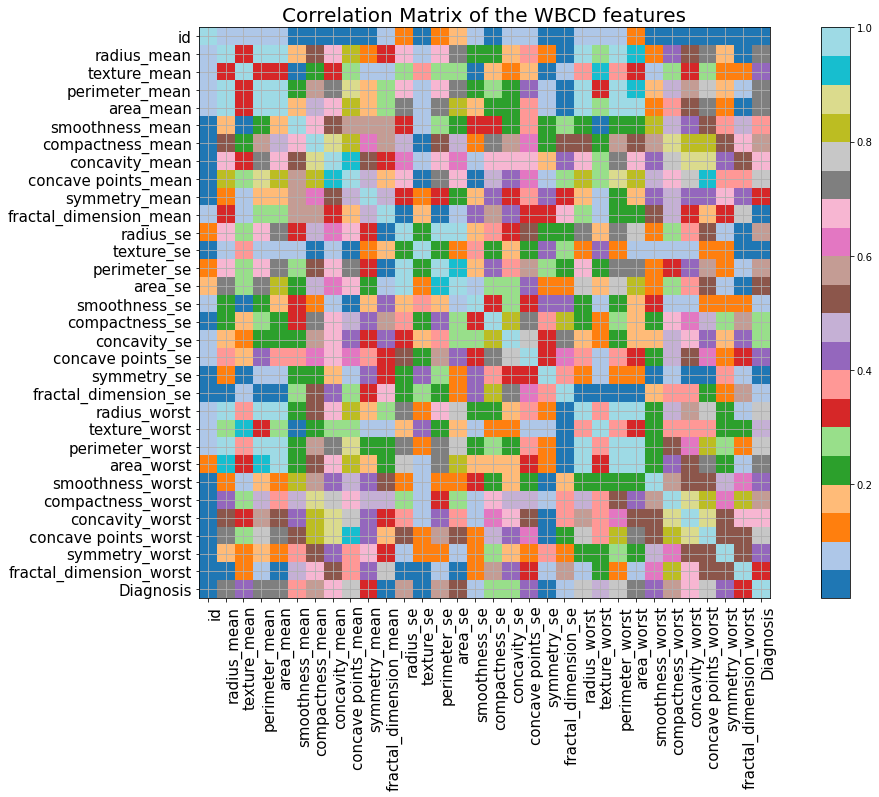

In [186]:
correlation_matrix(data_features)

In [187]:
corr_matrix = data_features.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [188]:
print(to_drop)

['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


In [189]:
data_faeture_droped=data_features.drop(data_features[to_drop],axis=1)

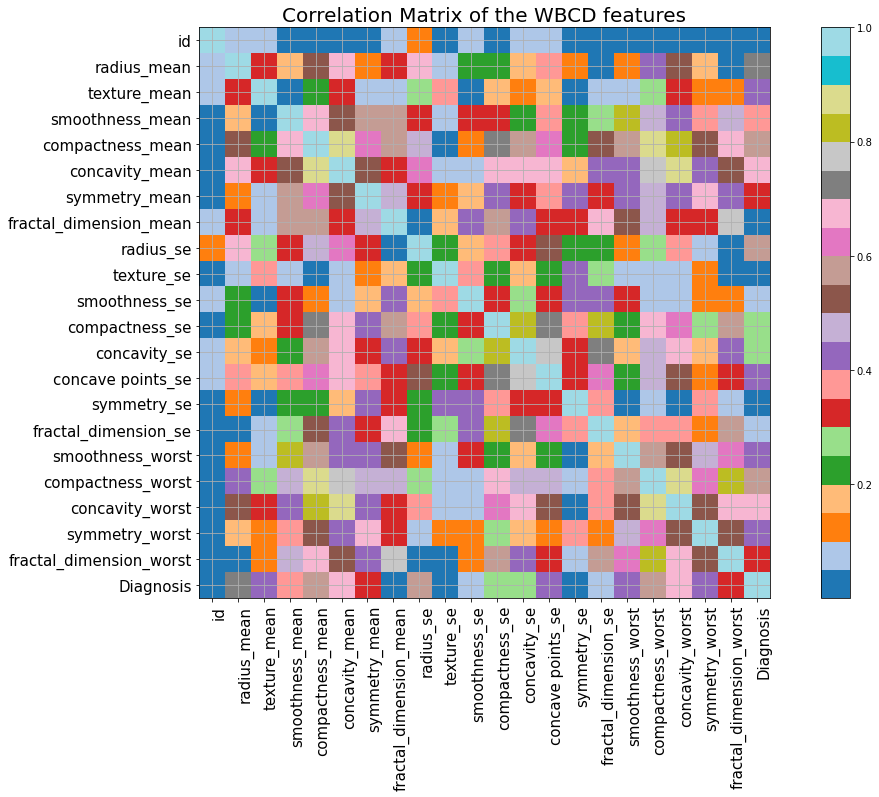

In [190]:
correlation_matrix(data_faeture_droped)



In [192]:
data_faeture_droped.corr().abs()

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
id,1.000000,0.074626,0.099770,0.012968,0.000096,0.050080,0.022114,0.052511,0.143048,0.007526,...,0.055239,0.078768,0.017306,0.025725,0.010338,0.002968,0.023203,0.044224,0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.170581,0.506124,0.676764,0.147741,0.311631,0.679090,0.097317,...,0.194204,0.376169,0.104321,0.042641,0.119616,0.413463,0.526911,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.023389,0.236702,0.302418,0.071401,0.076437,0.275869,0.386358,...,0.143293,0.163851,0.009127,0.054458,0.077503,0.277830,0.301025,0.105008,0.119205,0.415185
smoothness_mean,0.012968,0.170581,0.023389,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,0.068406,...,0.248396,0.380676,0.200774,0.283607,0.805324,0.472468,0.434926,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,0.046205,...,0.570517,0.642262,0.229977,0.507318,0.565541,0.865809,0.816275,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,0.076218,...,0.691270,0.683260,0.178009,0.449301,0.448822,0.754968,0.884103,0.409464,0.514930,0.696360
symmetry_mean,0.022114,0.147741,0.071401,0.557775,0.602641,0.500667,1.000000,0.479921,0.303379,0.128053,...,0.342627,0.393298,0.449137,0.331786,0.426675,0.473200,0.433721,0.699826,0.438413,0.330499
fractal_dimension_mean,0.052511,0.311631,0.076437,0.584792,0.565369,0.336783,0.479921,1.000000,0.000111,0.164174,...,0.446630,0.341198,0.345007,0.688132,0.504942,0.458798,0.346234,0.334019,0.767297,0.012838
radius_se,0.143048,0.679090,0.275869,0.301467,0.497473,0.631925,0.303379,0.000111,1.000000,0.213247,...,0.332358,0.513346,0.240567,0.227754,0.141919,0.287103,0.380585,0.094543,0.049559,0.567134
texture_se,0.007526,0.097317,0.386358,0.068406,0.046205,0.076218,0.128053,0.164174,0.213247,1.000000,...,0.194998,0.230283,0.411621,0.279723,0.073658,0.092439,0.068956,0.128215,0.045655,0.008303


In [193]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [194]:
def net_input(theta, x):
    return np.dot(x, theta)

In [195]:
def CostFunction(theta, X, y):
    m,n = X.shape
    h = X.dot(theta)
    
    J = -(np.sum(y * np.log(sigmoid(h)) + (1-y) * np.log(1 - sigmoid(h)))/m)
    
    return J

In [196]:
def calcGradient(theta, X, y):
    m,n = X.shape
    h = X.dot(theta)
    error = sigmoid(h) - y
    
    gradient = 1/m * (X.T).dot(error)
    
    return gradient

In [197]:
def FeatureScalingNormalization(X):
    X_norm = X
    
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    mu = np.vstack((X[0].mean(), X[1].mean()))
    sigma = np.vstack((X[0].std(ddof=1), X[1].std(ddof=1)))
    
    m = X.shape[1]
    
    mu_matrix = np.multiply(np.ones(m), mu).T
    sigma_matrix = np.multiply(np.ones(m), sigma).T
    
    X_norm = np.subtract(X, mu).T
    X_norm = X_norm/sigma.T
    
    return [X_norm, mu, sigma]

In [198]:
def CalcAccuracy(theta, X):
    p = sigmoid(X.dot(theta)) >= 0.5
    return p

In [199]:
data.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32',
       'Diagnosis'],
      dtype='object')

<AxesSubplot:>

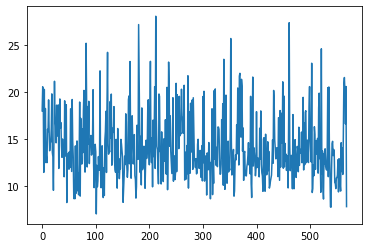

In [200]:
data.radius_mean.plot()

<AxesSubplot:>

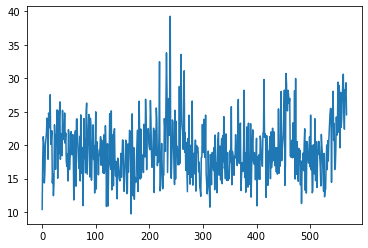

In [201]:
data.texture_mean.plot()

In [202]:
X = np.vstack((np.asarray(data.radius_mean.values), np.asarray(data.texture_mean.values)))
y = np.asarray(data.Diagnosis.values)

Text(0, 0.5, 'texture_mean')

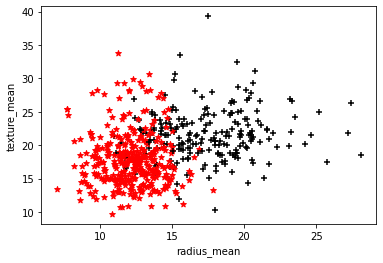

In [203]:

for i in range(len(y)):
    if y[i] == 0.0:
        c = 'r'
        m = u'*'
    if y[i] == 1.0:
        c = 'black'
        m = u'+'
        
    plt.scatter(X[0][i], X[1][i], color=c, marker=m)
    
    
plt.xlabel(data.columns[data.columns.get_loc('radius_mean')])
plt.ylabel(data.columns[data.columns.get_loc('texture_mean')])

In [204]:
featuresNormalizeresults = FeatureScalingNormalization(X)

X = np.asarray(featuresNormalizeresults[0]).T

mu = featuresNormalizeresults[1]

sigma = featuresNormalizeresults[2]


In [205]:
m = len(y) 

n = len(X)

X = np.vstack((np.ones(m), X)).T

In [206]:

initial_theta = np.zeros(n+1); # set theta = [0, 0, 0]

print ("J", CostFunction(theta=initial_theta, X=X, y=y))
print ("grad", calcGradient(theta=initial_theta, X=X, y=y))

J 0.6931471805599453
grad [ 0.12741652 -0.35265304 -0.20056252]


In [207]:
test_theta = [-24, 1.2, 0.2];

print ("J", CostFunction(theta=test_theta, X=X, y=y))
print ("grad", calcGradient(theta=test_theta, X=X, y=y))

J 8.4787073665132
grad [-0.37258348 -0.35265304 -0.20056252]


In [213]:
plot_x = np.asarray([X.T[1].min()+1, X.T[1].max()-3])

plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])
print(plot_x)
print(plot_y)

[-1.027864   0.9677964]
[126.16718398 114.19322158]


Text(0, 0.5, 'texture_mean')

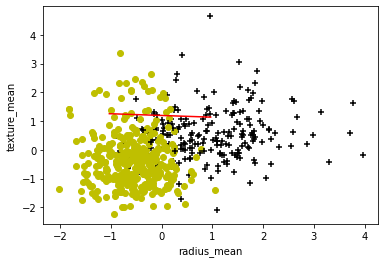

In [218]:
plot_x = np.asarray([X.T[1].min()+1, X.T[1].max()-3])

plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])/100

for i in range(len(y)):
    if y[i]==0.0:
        c = 'y'
        m = u'o'
    if y[i]==1.0:
        c = 'black'
        m = u'+'
    plt.scatter(X.T[1][i], X.T[2][i], color=c, marker=m) 
    
plt.plot(plot_x, plot_y, color='red')

plt.xlabel(data.columns[data.columns.get_loc("radius_mean")])
plt.ylabel(data.columns[data.columns.get_loc("texture_mean")])

In [219]:
# Calculate accuracy
p = CalcAccuracy(theta, X)
p = (p == y) * 100
print ("Train Accuracy:", p.mean())

Train Accuracy: 62.74165202108963


In [220]:
data

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1


In [223]:
data.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32',
       'Diagnosis'],
      dtype='object')

In [224]:
X= data.drop('Diagnosis',axis=1)
Y= data['Diagnosis']

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score

In [245]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.30, random_state = 101)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((398, 32), (171, 32), (398,), (171,))

In [252]:
import pandas as pd

In [253]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])
X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

AttributeError: 'Series' object has no attribute 'reshape'

In [228]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [236]:
def model(X, Y, learning_rate, iterations):

    m = X_train.shape[1]
    n = X_train.shape[0]
    W = np.zeros((n,1))
    B = 0
    cost_list = []
    for i in range(iterations):
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
    
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
    
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
    
        cost_list.append(cost)
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
    return W, B, cost_list

In [243]:
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate,iterations=iterations )


ValueError: operands could not be broadcast together with shapes (398,) (1,32) 